In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')
os.chdir("/content/gdrive/MyDrive/DISSERTATION")
print(os.listdir())

Mounted at /content/gdrive/
['simple_hilbert.py', '__pycache__', 'Flowpast', 'MeshCNN', 'cache', 'fpc_000.npz (Unzipped Files)', 'Advection_of_a_block_over_structured_mesh.ipynb', 'fpc2.obj', 'Diss.ipynb', 'csv_data', 'fpc3.obj', 'TENS', 'Diss2.ipynb', 'AE with FC.ipynb', 'Diss3.ipynb', 'Compressed.obj', 'AverageAndNormalise.ipynb', 'CAE_on_structured_mesh.ipynb', 'Training with FC.ipynb', 'PyTorch Geometric attempt 2', 'SFC-CAE-Ready-to-use-main', 'MoreChannels.ipynb']


In [ ]:
#Importing a bunch of stuff from MeshCNN
os.chdir("./MeshCNN")
print(os.listdir())
import models
import options.train_options
os.chdir("./util")
import mesh_viewer
os.chdir("..")
os.chdir("./models")
import networks
os.chdir("./layers")
import mesh
import mesh_pool
import mesh_union
os.chdir("../../../")

['.git', '.gitignore', '.travis.yml', 'LICENSE', 'README.md', 'data', 'docs', 'environment.yml', 'models', 'options', 'scripts', 'test.py', 'train.py', 'util', 'cache']


In [ ]:
#Importing a bunch more libraries
import numpy as np
import matplotlib.pyplot as plt
import torch  # Pytorch
import torch.nn as nn  # Neural network module
import torch.nn.functional as fn  # Function module
from torchvision import datasets  # Datasets from torchvision
from torchvision import transforms  # Transforms from torchvision
from torch.utils.data import DataLoader
from matplotlib import animation
import sys
import progressbar

In [ ]:
!pip install pycm livelossplot
%pylab inline
from livelossplot import PlotLosses

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 571 kB 9.4 MB/s 
Populating the interactive namespace from numpy and matplotlib


In [ ]:
import random 
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

device = 'cuda'  # Set out device to GPU

print('Cuda installed, running on GPU!')  # print sentence

Cuda installed, running on GPU!


In [ ]:
def loadfpc(index):
  vels = open("./csv_data/data_"+ str(index) + ".csv")
  velocities = np.loadtxt(vels, delimiter=",")[:,3:5]
  EdgeFeatures = np.array([[(velocities[edge[0]][0]+velocities[edge[1]][0])/2,(velocities[edge[0]][1]+velocities[edge[1]][1])/2] for edge in fpcmesh.edges])
  velx = torch.Tensor([[EdgeFeatures[:,0],EdgeFeatures[:,1]]])
  return velx

In [ ]:
data = loadfpc(20)

In [ ]:
#Opt class from MeshCNN, to create a "Mesh" class you need an option class for data augmentation purposes, hard to get mesh loading to work otherwise
class opt:
  num_aug = 1

In [ ]:
#Creating my flow past cylinder mesh
fpcmesh = mesh.Mesh("fpc3.obj",opt=opt)
fpcmesh.init_history()

In [ ]:
pooloperator = mesh_pool.MeshPool(2000)

In [ ]:
pooloperator(data,[fpcmesh])

tensor([[[ 3.9044e-02,  3.9053e-02,  3.9055e-02,  ...,  3.9858e-02,
           4.0041e-02,  3.9728e-02],
         [ 1.5070e-04,  2.0752e-05, -2.0706e-05,  ...,  8.9221e-05,
           4.9996e-06,  4.2264e-05]]])

In [ ]:
edge_groups = mesh_union.MeshUnion(fpcmesh.edges_count, data.device)
mask = np.ones(fpcmesh.edges_count, dtype=np.bool)

In [ ]:
triplets = []
for i in range(fpcmesh.edges_count):
  if not pooloperator.has_boundaries(fpcmesh,i):
    invalid_edges = pooloperator._MeshPool__get_invalids(fpcmesh,i,edge_groups,2)
    while len(invalid_edges) != 0 and mesh.edges_count > self.__out_target:
      self.__remove_triplete(mesh, mask, edge_groups, invalid_edges)
      if self.has_boundaries(mesh, edge_id):
          pass
      else:
        invalid_edges = self.__get_invalids(mesh, edge_id, edge_groups, side)

In [ ]:
for i in range(fpcmesh.edges_count):
  if not pooloperator.has_boundaries(fpcmesh,i):
    print(pooloperator._MeshPool__get_invalids(fpcmesh,i,edge_groups,2))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [ ]:
print(edge_groups)

In [ ]:
fpcmesh.export("cleaned.obj")

IndexError: ignored

In [ ]:
for i in range(fpcmesh.edges_count):
  pooloperator._MeshPool__clean_side(fpcmesh,i,mask,edge_groups,0)
  pooloperator._MeshPool__clean_side(fpcmesh,i,mask,edge_groups,2)

In [ ]:
fpcmesh.export("4000cleaned.obj")

In [ ]:
pooloperator._MeshPool__build_queue(data[0,:,:10421],10421)

[[2.512081493932783e-07, 9364.0],
 [1.0285508551532985e-06, 8643.0],
 [2.873500307032373e-06, 6636.0],
 [1.1149066949656117e-06, 4340.0],
 [1.1965354133280925e-05, 5434.0],
 [3.808276687777834e-06, 6494.0],
 [5.137390417075949e-06, 7179.0],
 [2.167976390410331e-06, 8439.0],
 [5.220441380515695e-06, 9363.0],
 [1.206222441396676e-05, 10249.0],
 [1.961889211088419e-05, 751.0],
 [1.9141356460750103e-05, 6634.0],
 [9.051485903910361e-06, 6851.0],
 [8.680438622832298e-05, 7180.0],
 [1.0624413334880956e-05, 7867.0],
 [2.2162371351441834e-06, 8462.0],
 [1.5827994502615184e-05, 9185.0],
 [8.544249794795178e-06, 9527.0],
 [1.4010773156769574e-05, 10000.0],
 [1.2612059435923584e-05, 10250.0],
 [0.0001995434722630307, 5435.0],
 [0.0007991687161847949, 2909.0],
 [5.4098818509373814e-05, 750.0],
 [0.000835494021885097, 6203.0],
 [3.275017297710292e-05, 6654.0],
 [9.713069630379323e-06, 6852.0],
 [3.6549092328641564e-05, 7092.0],
 [0.00012861378490924835, 7183.0],
 [0.000181959243491292, 7673.0],
 [1

In [ ]:
train_ratio = 0.8
valid_ratio = 0.1
test_ratio = 0.1
train_index, valid_index, test_index = index_split(train_ratio, valid_ratio, test_ratio, total_num = 2000)

In [ ]:
train_set = load_tensor(train_index)
valid_set = load_tensor(valid_index)
test_set = load_tensor(test_index)

100% (1600 of 1600) |####################| Elapsed Time: 0:06:06 Time:  0:06:06
100% (200 of 200) |######################| Elapsed Time: 0:00:19 Time:  0:00:19
100% (199 of 199) |######################| Elapsed Time: 0:00:19 Time:  0:00:19


In [ ]:
torch.save(train_set, './TENS/train_tensor.pt')
torch.save(valid_set, './TENS/valid_tensor.pt')
torch.save(test_set, './TENS/test_tensor.pt')

In [ ]:
train_set = torch.load('./TENS/train_tensor.pt', map_location=torch.device('cpu'))
valid_set = torch.load('./TENS/valid_tensor.pt', map_location=torch.device('cpu'))
test_set = torch.load('./TENS/test_tensor.pt', map_location=torch.device('cpu'))

In [ ]:
print(train_set.size())

torch.Size([1600, 2, 10421])


In [ ]:
def train(autoencoder, optimizer, criterion, dataloader):
  counter = 0
  autoencoder.train()
  train_loss, data_length = 0, len(dataloader.dataset)
  for batch in dataloader:
      counter +=1
      meshes = []
      for i in range(dataloader.batch_size):
        fpcmesh = mesh.Mesh("fpc3.obj",opt=opt)
        fpcmesh.init_history()
        meshes.append(fpcmesh)
      # fpcmesh = mesh.Mesh("fpc3.obj",opt=opt)
      # fpcmesh.init_history()
      batch = batch.to(device)  # Send batch of images to the GPU
      optimizer.zero_grad()  # Set optimiser grad to 0
      x_hat = autoencoder(batch,meshes)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      # print("hello")
      # print(batch.size(),x_hat.size())
      MSE = criterion(batch, x_hat)  # Calculate MSE loss
      print(MSE,counter)
      MSE.backward()  # Back-propagate
      optimizer.step()  # Step the optimiser
      train_loss += MSE * batch.size(0)

  return train_loss / data_length  # Return MSE

def validate(autoencoder, optimizer, criterion, dataloader):
    autoencoder.eval()
    validation_loss, data_length = 0, len(dataloader.dataset)
    for batch in dataloader:
        with torch.no_grad():
            meshes = []
            for i in range(dataloader.batch_size):
              fpcmesh = mesh.Mesh("fpc3.obj",opt=opt)
              fpcmesh.init_history()
              meshes.append(fpcmesh)
            batch = batch.to(device)  # Send batch of images to the GPU
            x_hat = autoencoder(batch,meshes)  # Generate predicted images (x_hat) by running batch of images through autoencoder
            MSE = criterion(batch, x_hat)  # Calculate MSE loss
            validation_loss += MSE * batch.size(0)

    return validation_loss / data_length   # Return MSE

In [ ]:
def train_model(autoencoder, batch_size=4, n_epochs = 10, visualize=True):
  set_seed(42)
  autoencoder = autoencoder.to(device)
  optimizer = torch.optim.Adam(autoencoder.parameters())

  # we choose the MSE to be the loss function 
  criterion = nn.MSELoss()

  train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
  valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=True, num_workers=0)
  
  # do livelossplot if visualize turned-on
  if visualize:
      liveloss = PlotLosses()

  for epoch in range(n_epochs):
    train_MSE = train(autoencoder, optimizer, criterion, train_loader)
    validation_MSE = validate(autoencoder, optimizer, criterion, valid_loader)
    print("eppoch %d starting......"%(epoch))
    
    # do livelossplot if visualize turned-on 
    if visualize: 
      logs = {}

      logs['' + 'log loss'] = train_MSE.item()
      logs['val_' + 'log loss'] = validation_MSE.item()

      liveloss.update(logs)
      liveloss.draw()

      
  return autoencoder

In [ ]:
Each time we do a pooling operation in Meshcnn, it has to save the edges that it's actually pooled. Each time it changes, based on what the edge with the highest value is, and so it has to store that data somewhere and i think it's cheating.

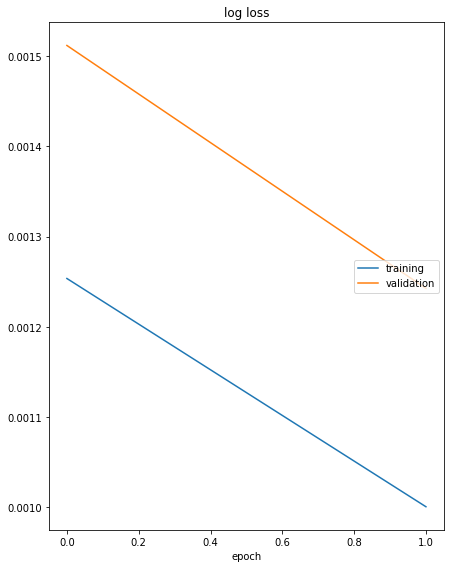

log loss
	training         	 (min:    0.001, max:    0.001, cur:    0.001)
	validation       	 (min:    0.001, max:    0.002, cur:    0.001)
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 1
tensor(0.0011, device='cuda:0', grad_fn=<MseLossBackward>) 2
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 3
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>) 4
tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward>) 5
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>) 6
tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward>) 7
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 8
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 9
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>) 10
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 11
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>) 12
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>) 13
tensor(0.0010, device='cuda:0', grad_fn=<MseLossBackward>) 14


IndexError: ignored

In [ ]:
autoencoder = train_model(AEFC2)

In [ ]:
torch.save(AEFC2.state_dict(), "./weights2.w")

In [ ]:
AEFC2.load_state_dict(torch.load("./weights.w"))

<All keys matched successfully>

In [ ]:
fpcmesh = mesh.Mesh("fpc3.obj",opt=opt)
fpcmesh.init_history()

In [ ]:
print(len(fpcmesh.edges))

10421


In [ ]:
print(fpcmesh.edges)

[[ 109  383]
 [ 108  383]
 [ 108  109]
 ...
 [ 113  114]
 [ 112  113]
 [ 112 3570]]


In [ ]:
print(fpcmesh.edges[2,0])

108


In [ ]:
M = numpy.zeros((10421,3571))

In [ ]:
print(M).(valuesofvertices) = valuesofedges

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


In [ ]:
print(M[0,109])

0.5


In [ ]:
for i in range(len(fpcmesh.edges)):
  M[i,fpcmesh.edges[i,0]] = 0.5
  M[i,fpcmesh.edges[i,1]] = 0.5

In [ ]:
Ax= b

In [ ]:
tocompress = loadfpc(20)

In [ ]:
tocompress.size()

torch.Size([1, 2, 1298])

In [ ]:
compressed = AEFC2.forward(tocompress.to('cuda'),[fpcmesh])

In [ ]:
compressed.size()

torch.Size([1, 2, 10421])

In [ ]:
compressed = compressed.cpu()

In [ ]:
tocompress

tensor([[[ 4.1934e-02,  3.9053e-02,  3.9055e-02,  ...,  4.2315e-02,
           4.0041e-02,  3.9728e-02],
         [ 9.1012e-04,  2.0752e-05, -2.0706e-05,  ...,  9.1105e-04,
           4.9996e-06,  4.2264e-05]]])

In [ ]:
compressed

tensor([[[0.0431, 0.0431, 0.0415,  ..., 0.0415, 0.0415, 0.0431],
         [0.0325, 0.0325, 0.0345,  ..., 0.0345, 0.0345, 0.0325]]],
       grad_fn=<CopyBackwards>)

In [ ]:
w = np.array(compressed[0,0,:].detach().numpy())

In [ ]:
v = np.array(compressed[0,1,:].detach().numpy())

In [ ]:
x = np.linalg.lstsq(M,w)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.linalg.lstsq(M,v)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
print(x[0])

[0.00286799 0.05007799 0.02894537 ... 0.04375166 0.04043495 0.04374372]


In [ ]:
print(y[0])

[0.0197412  0.04968043 0.09654019 ... 0.03181763 0.06582376 0.03182716]


In [ ]:
numpy.savetxt("x.csv", x[0], delimiter=",")
numpy.savetxt("y.csv", y[0], delimiter=",")

In [ ]:
vels = open("./csv_data/data_"+ str(20) + ".csv")
velocities = np.loadtxt(vels, delimiter=",")[:,3:5]

FileNotFoundError: ignored

In [ ]:
print(velocities)

[[ 0.00344896 -0.00060597]
 [ 0.04196855 -0.00123742]
 [-0.0014227   0.00017891]
 ...
 [ 0.03899728 -0.00024794]
 [ 0.01740772  0.01590091]
 [ 0.03986315  0.00015168]]


In [ ]:
print(tocompress.size())

torch.Size([1, 2, 10421])


In [ ]:
print(tocompress.size())

torch.Size([1, 2, 10421])


In [ ]:
tocompress = tocompress.to(device)

In [ ]:
tocompress

tensor([[[3.9074e-02, 3.9036e-02, 3.9053e-02,  ..., 4.0041e-02,
          3.9728e-02, 3.9734e-02],
         [3.2951e-05, 2.8814e-05, 2.0752e-05,  ..., 4.9996e-06,
          4.2264e-05, 1.0473e-04]]], device='cuda:0')

In [ ]:
compressed = AEFC2(tocompress,[fpcmesh])

In [ ]:
print(tocompress-compressed)

tensor([[[-0.0627, -0.1248, -0.0400,  ..., -0.0784, -0.0534, -0.1248],
         [-0.1215, -0.0849, -0.1013,  ..., -0.0899, -0.0992, -0.0888]]],
       device='cuda:0', grad_fn=<SubBackward0>)


In [ ]:
print(tocompress.size(),compressed.size())

torch.Size([1, 2, 10421]) torch.Size([1, 2, 10421])
